# 逐次探索法

In [2]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random
from my_modules import record

In [3]:
def sequential_search(records, key):
    N = len(records)
    for i in range(N):
        if records[i][0] == key:
            return records[i]
    raise Exception('key \'{}\' does not exist in records.'.format(key))

In [4]:
records = record.get_unique_records(10)
result = sequential_search(records, 5)
records, result

(array([[ 6, 60],
        [ 4, 40],
        [ 1, 10],
        [ 9, 90],
        [ 8, 80],
        [ 0,  0],
        [ 3, 30],
        [ 2, 20],
        [ 7, 70],
        [ 5, 50]]), array([ 5, 50]))

In [5]:
n_list = []
t_total_list = []
t_ave_list = []
for n in [1000*i for i in range(1, 10+1)]:
    records = record.get_unique_records(n)
    start = time.time()
    for key in range(n):
        sequential_search(records, key)
    end = time.time()
    n_list.append(n)
    t_total_list.append(round((end-start), 6))
    t_ave_list.append(round((end-start)*1e6/n))

pd.DataFrame(data=np.array([n_list, t_total_list, t_ave_list]).T, columns=['number of records', 'total search time [s]', 'average search time [$\mu$s]'])

,number of records,total search time [s],average search time [$\mu$s]
0,1000.0,0.418834,419.0
1,2000.0,2.111028,1056.0
2,3000.0,4.278176,1426.0
3,4000.0,6.798269,1700.0
4,5000.0,11.866361,2373.0
5,6000.0,15.864547,2644.0
6,7000.0,22.282143,3183.0
7,8000.0,28.301638,3538.0
8,9000.0,34.240019,3804.0
9,10000.0,42.129189,4213.0


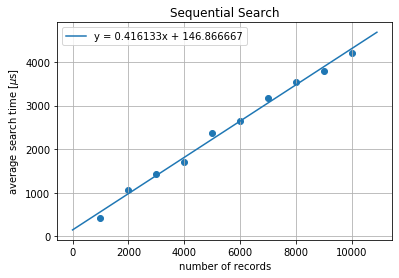

In [6]:
from scipy.optimize import curve_fit
def func_fit(x, a, b):
    return a * x + b

param, cov = curve_fit(func_fit, n_list, t_ave_list)
x = np.array([i*100 for i in range(int(max(n_list)/100)+10)])
y = func_fit(x, param[0], param[1])

plt.title('Sequential Search')
plt.xlabel('number of records')
plt.ylabel('average search time [$\mu$s]')
plt.plot(x, y, label='y = {}x + {}'.format(round(param[0], 6), round(param[1], 6)))
plt.scatter(n_list, t_ave_list)
plt.grid()
plt.legend()
plt.show()